In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pylab import rcParams

In [2]:
directory = "sizelog"
loglist = []

In [3]:
def make_loglist(directory_name):
    filelist = os.listdir(directory_name)
    for filename in filelist:
        if "_sizelog" in filename:
            loglist.append(os.path.join(directory_name, filename))
    return loglist

loglist = make_loglist(directory)

In [4]:
def make_sizedata(loglist):
    #引数：e**_sizelog.txtのファイル名リスト
    sizedata = pd.DataFrame(columns=['id', 'cube', 'convexhull', 'expected_num_strands', 'actual_num_strands'])
    for logfile in loglist:
        #file = open(logfile, "r")
        df = pd.read_csv( logfile, header=0, names = ("id", "cube", "convexhull", "expected_num_strands", "actual_num_strands"))
        df["id"] = df["id"].apply(int)

        sizedata = sizedata.append(df).sort_values("id").reset_index(drop = True)
        df.to_csv("sizedata1.csv", index = False)

    return sizedata
#返り値：id,cubesize,convexhullsizeの順にまとめたデータフレーム 

               cube   convexhull
count    357.000000   357.000000
mean    3294.746274   503.594725
std     4217.141587   596.453373
min        6.477842     3.218475
25%     1014.892667   207.050989
50%     1930.404513   349.754011
75%     3613.857750   567.411977
max    33432.587079  6679.302871


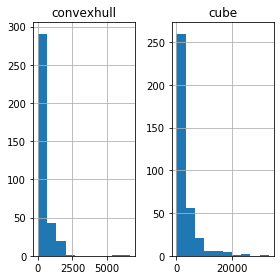

In [5]:
sizedata = make_sizedata(loglist)
print(sizedata.describe())

rcParams['figure.figsize'] = 4, 4

sizedata.hist()
plt.tight_layout()
plt.show()


#sizedata.plot.scatter(x='id', y='cube')#idには特に意味はない

In [6]:
#sizedata.plot.scatter(x = "id", y = "convexhull")

In [7]:
#sizedata.plot.scatter(x = "cube", y = "convexhull")

In [8]:
#いろいろなサイズができていることを知りたい
#ヒストグラムをつくって表示
#これはpil一つから得たもののため、色々なpilからヒストグラムを作成してそれぞれ比較したい
#今年では(一つあたり三日なので)難しそうだ。
#参考 ：leoの実験では12個のpilで検証